In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Noted that:
From the snippet of the first 5 values of all dataset, we can see that the first column doesnt bring up any useful information for our prediction. Therefore, we would go ahead and treat it as the index column

In [2]:
diamond_df=pd.read_csv('diamonds.csv', index_col= 0) # treat df[0] as an index column
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Explotary Data Analysis

### Data Preprocessing

In this stage, there are 3 main things that need to be covered:
- Double check to make sure our data is cleaned and there is no fault or inconsistency
- Identify and handling outliers 
- Encoding categorial features


In [3]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [4]:
diamond_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Insight: 
- There is no missing value in our dataset, however, we need to check if there is any abnormal data value in our dataset to prevent faulty inputs. 
- 'clarity', and 'color','cut' are categorical features, and to retain the consistency of our data, we have to convert it into numberic values

In [5]:
diamond_df.shape

(53940, 10)

In [6]:
diamond_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### A point to notice:
The min value of "x" "y" "z" are zero indicates that there are records of dimensionless diamonds or 2 dimensional diamonds. These records are clearly inputs, therefore, we have to remove it from our data, to make sure that our data is validated

In [7]:
# remove values that are zeros from x,y and z columns 
diamond_df = diamond_df[(diamond_df['x'] != 0) & (diamond_df['y'] != 0) & (diamond_df['z'] != 0)]

In [8]:
d= diamond_df.describe()
d

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
diamond_df.shape

(53920, 10)


By printing out another statistic summary of our data, we can see that x,y,z no longer has 0 as its minimum values, which means that our code functions pretty well. Another point to notice is that we lost 20 samples from dropping records of non-3D diamonds. Next, we have to plot the bar count of all features to see if dropping these 20 records will result in imbalanced distribution of a feature, if it is true, we have to resample them. 

Text(0.5, 1.0, 'Bar plot of the count of features')

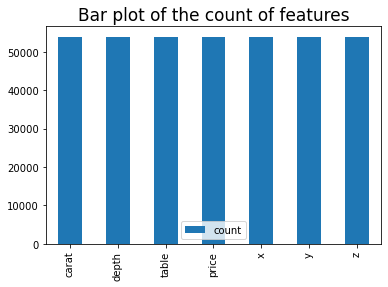

In [10]:
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of features",fontsize=17)

array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

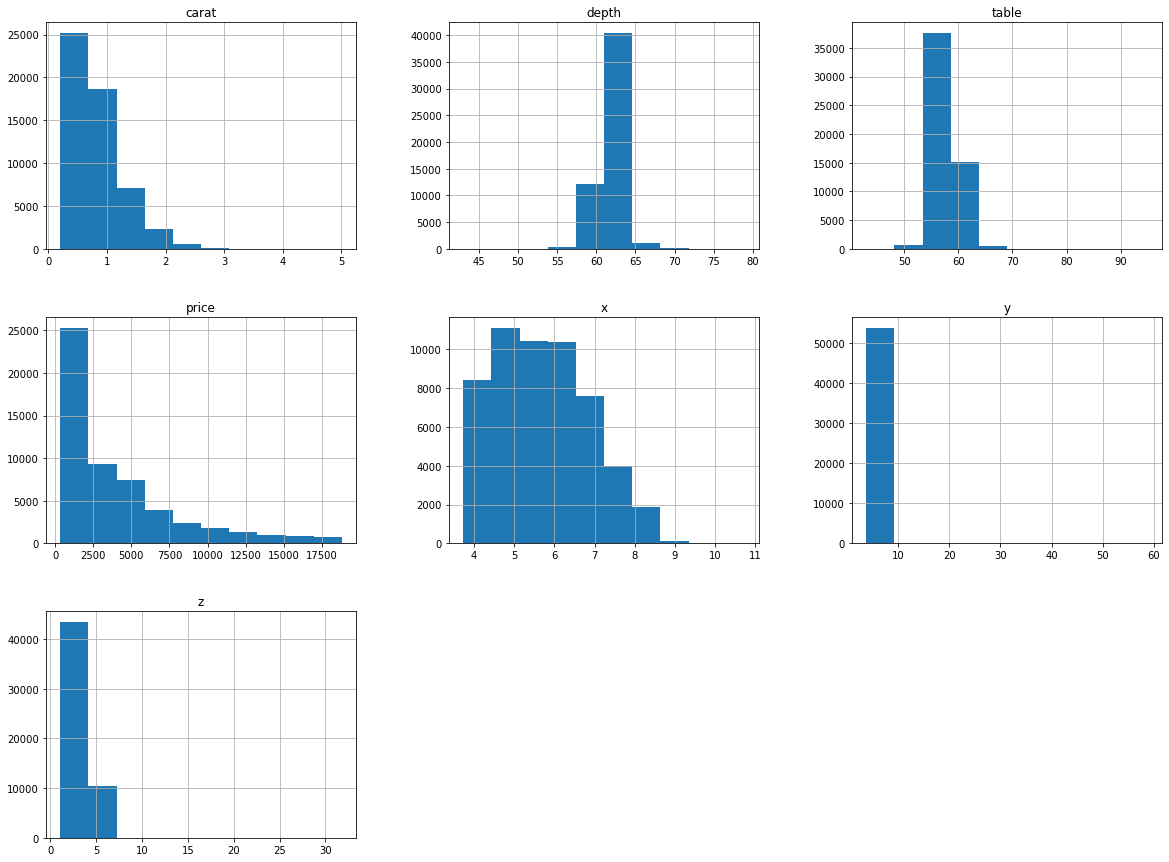

In [11]:
# histogram map 
%matplotlib inline
from matplotlib import pyplot as plt
diamond_df.hist(figsize=(20, 15))

### Histogram Interpretation: 
- Overall, our dependent variable - 'price' does not follow a normal distribution as its histogram is not symmetric, and the same happens for all of the other features 
- Looking at the histogram map, it is also evident that for all features, the majority of our data falls on the lower end of the range, with reletively fewer high value. 
- The problem with right skewed features is that there may exist some outliers, however, to identify them, and visualize vividly, we will use boxplots. 

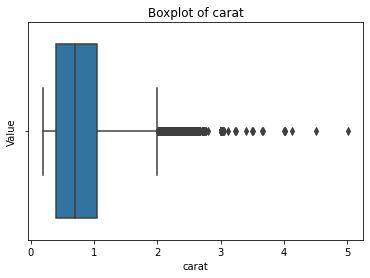

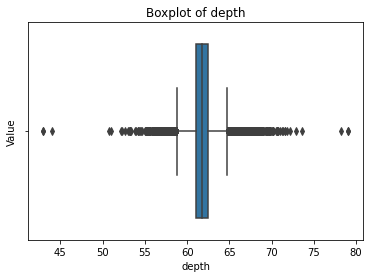

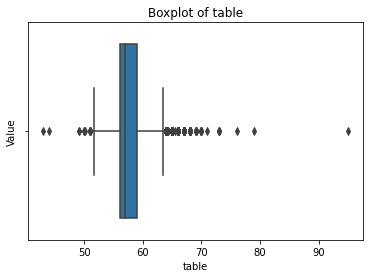

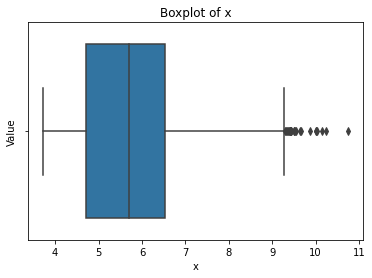

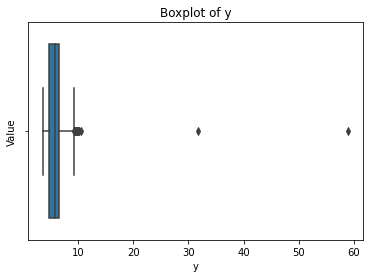

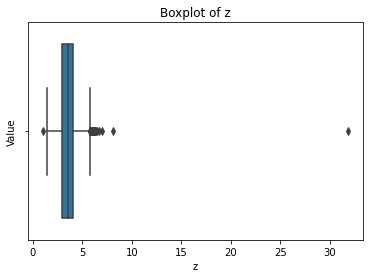

In [12]:
# boxplot for our numberical features 
feature_names=['carat','depth','table','x','y','z']
for feature in feature_names:
    plt.figure()
    sns.boxplot(x=diamond_df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Value')

plt.show()


### Boxplot Interpretation:
- There exist some datapoints that are far from the rest of it in some features, which may affect our model
- To decide what to do with these datapoints, we have to look at it more closely with the pairplot 

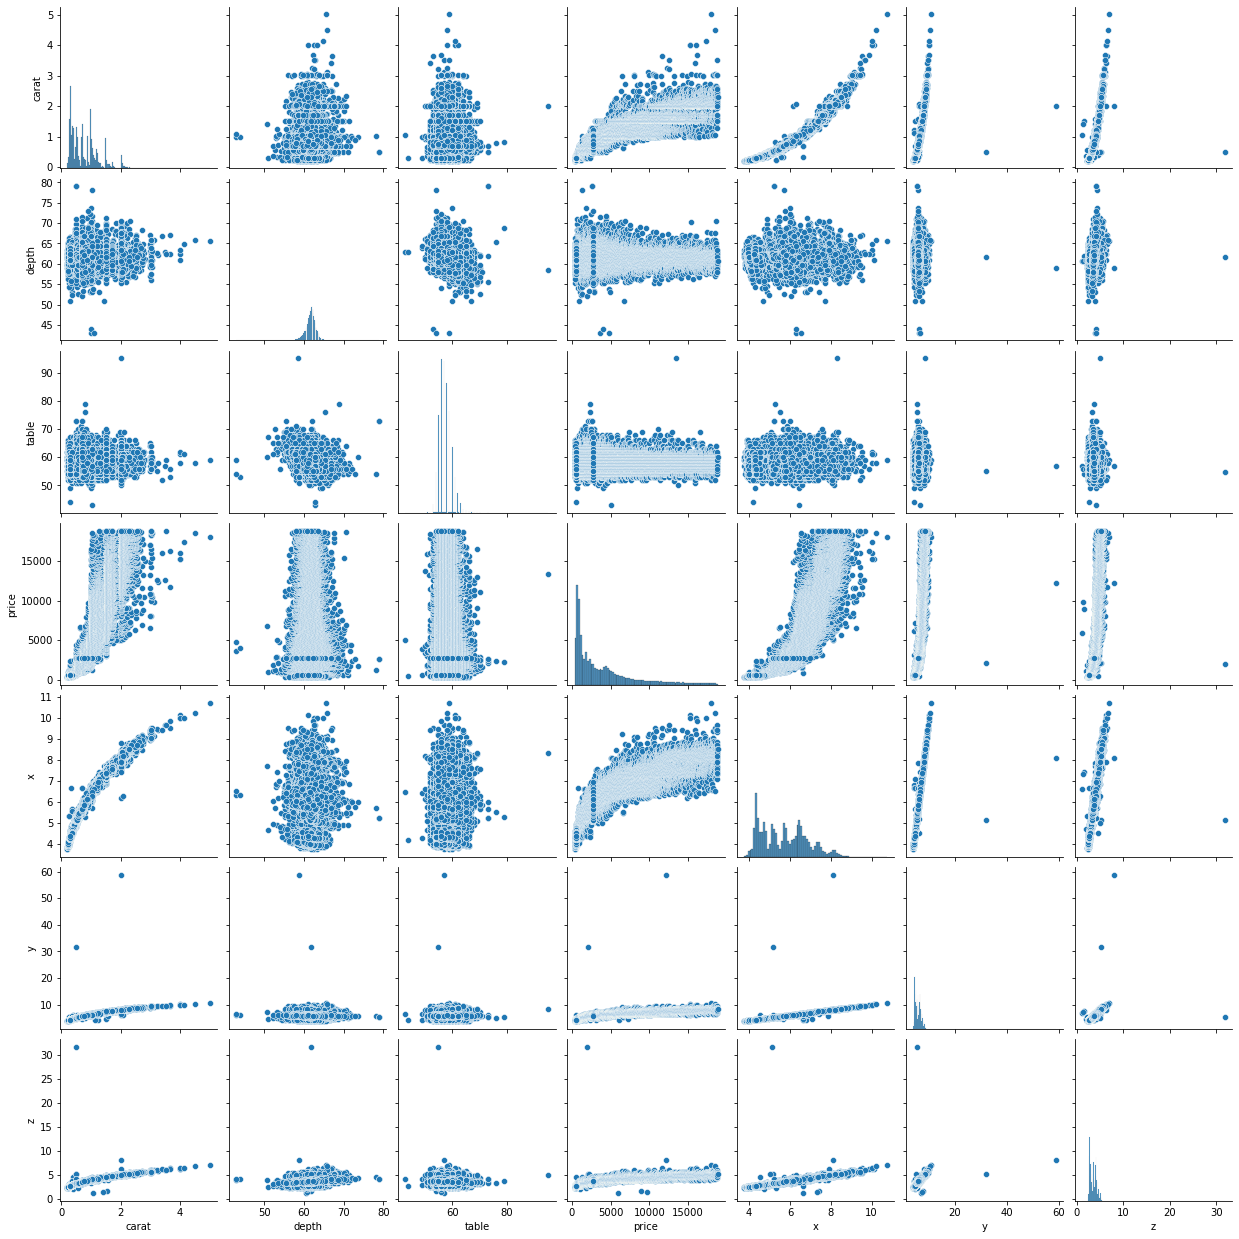

In [13]:
sns.pairplot(diamond_df)
plt.show()

### Pairplot interpretation:
- All independent features show a linear- like relationship with our dependent feature - price, which suggests that a linear regression, logistic regression, or decision tree will yield out a good result. However, in order for our model to have high accuracy, we need to select only independent features, which has highest pearson correlation value. Therefore, we will plot our the correlation heatmap and run a stastical analysis. 
- 'y','z', 'table' and 'depth' have some dimensional outliers that should be removed. However, to be more confirmed, we will look at the scatter matrix with regression line. 



### Regression Line Of X and 'Price'


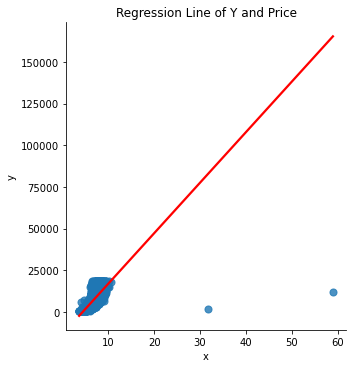

In [14]:
sns.lmplot(x='y', y='price', data=diamond_df, ci=None, scatter_kws={"s": 50}, line_kws={"color": "red"})
plt.title('Regression Line of Y and Price')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

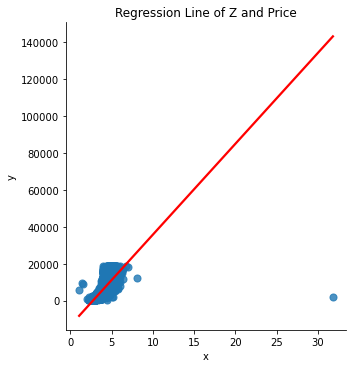

In [15]:
sns.lmplot(x='z', y='price', data=diamond_df, ci=None, scatter_kws={"s": 50}, line_kws={"color": "red"})
plt.title('Regression Line of Z and Price')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

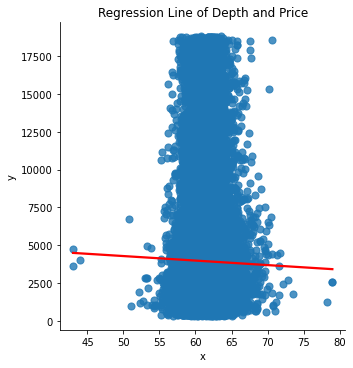

In [16]:
sns.lmplot(x='depth', y='price', data=diamond_df, ci=None, scatter_kws={"s": 50}, line_kws={"color": "red"})
plt.title('Regression Line of Depth and Price')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

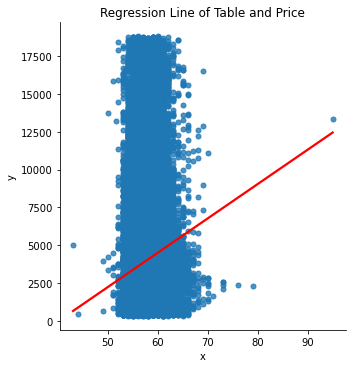

In [17]:
sns.lmplot(x='table', y='price', data=diamond_df, ci=None, scatter_kws={"s": 25}, line_kws={"color": "red"})
plt.title('Regression Line of Table and Price')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Dropping outliers


In [18]:
diamond_df= diamond_df[(diamond_df['y']<30)]
diamond_df= diamond_df[(diamond_df['z']<30) & (diamond_df['z']>2)]
diamond_df= diamond_df[(diamond_df['table']<80) & (diamond_df['table']>40)]
diamond_df= diamond_df[(diamond_df['depth']<75) & (diamond_df['depth']>45)]
diamond_df= diamond_df[(diamond_df['table']<80) & (diamond_df['depth']>40)]
diamond_df.shape

(53907, 10)

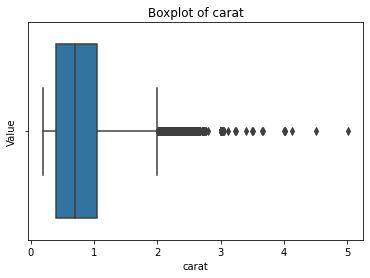

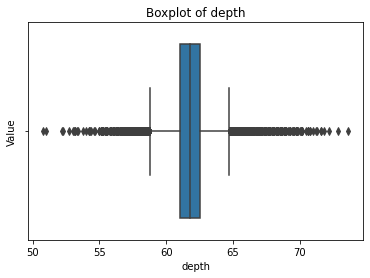

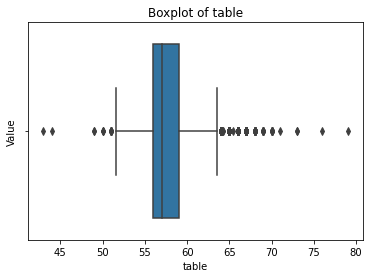

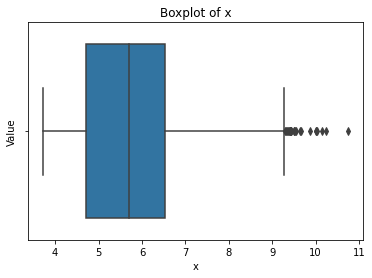

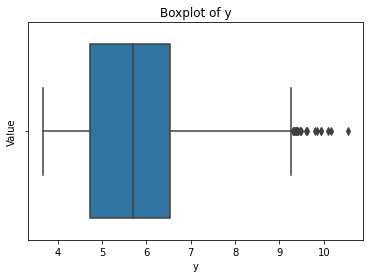

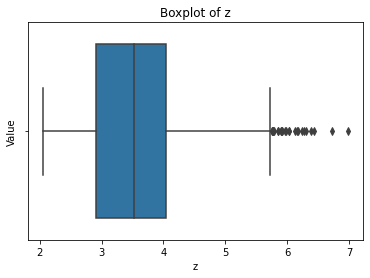

In [19]:
feature_names=['carat','depth','table','x','y','z']
for feature in feature_names:
    plt.figure()
    sns.boxplot(x=diamond_df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Value')

plt.show()


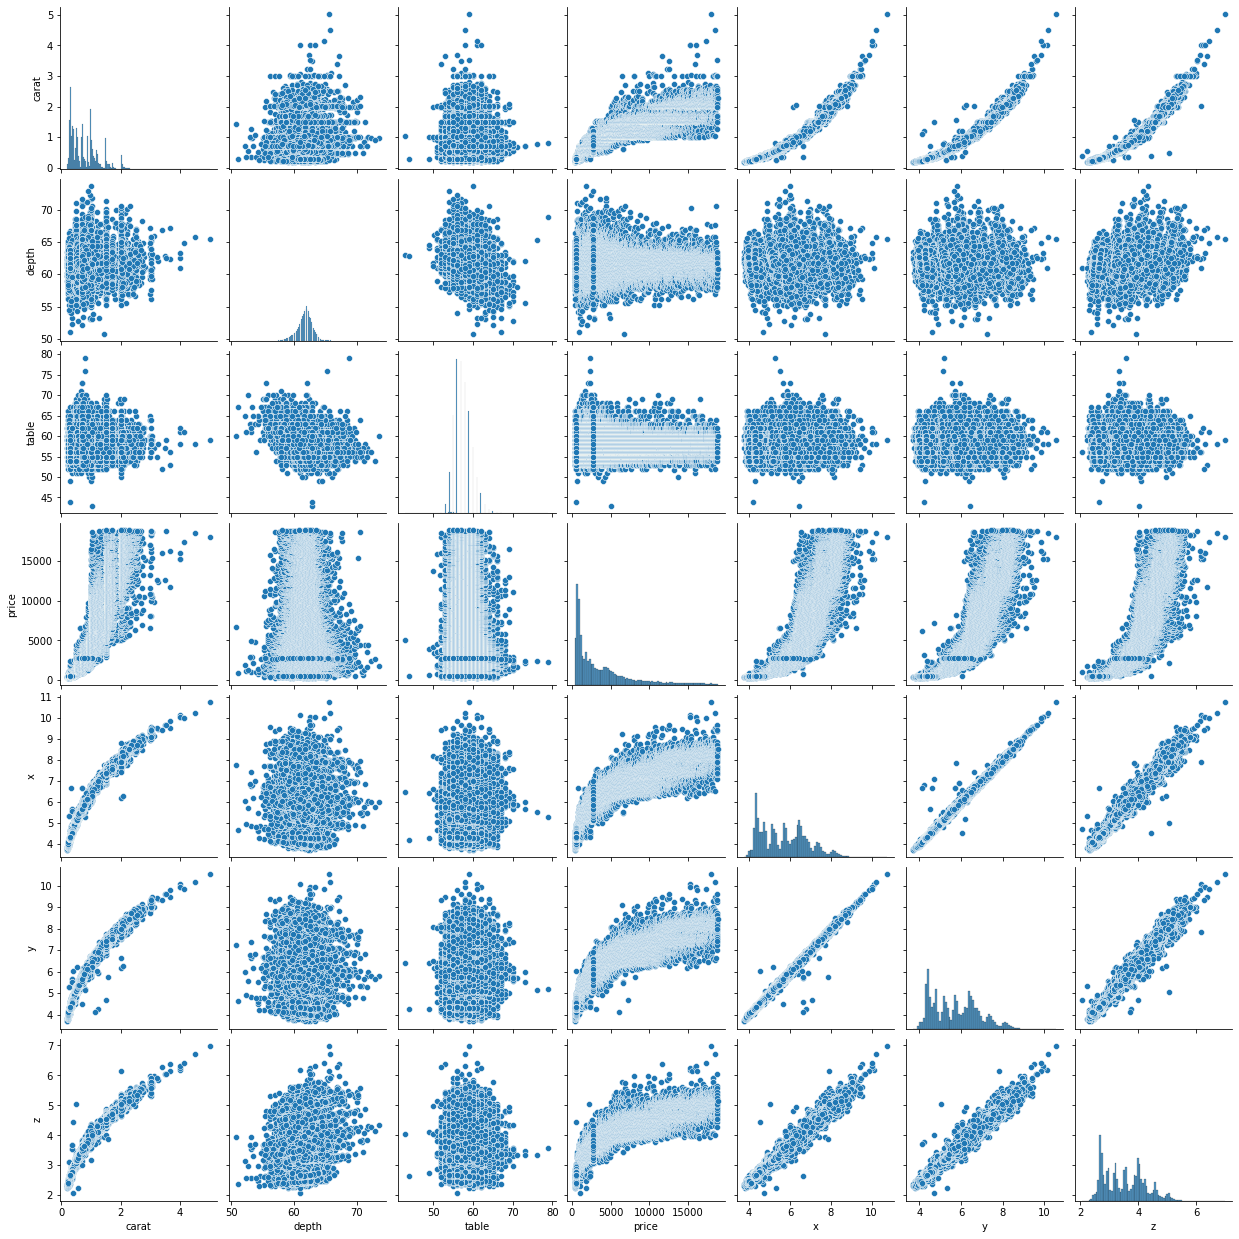

In [20]:
sns.pairplot(diamond_df)
plt.show()

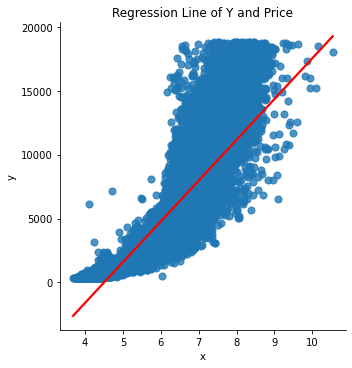

In [21]:
sns.lmplot(x='y', y='price', data=diamond_df, ci=None, scatter_kws={"s": 50}, line_kws={"color": "red"})
plt.title('Regression Line of Y and Price')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

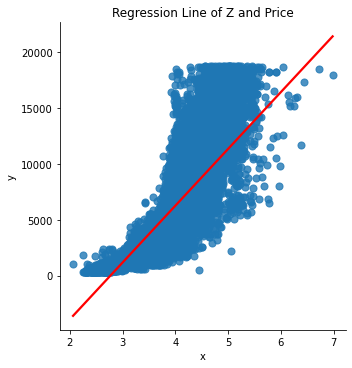

In [22]:
sns.lmplot(x='z', y='price', data=diamond_df, ci=None, scatter_kws={"s": 50}, line_kws={"color": "red"})
plt.title('Regression Line of Z and Price')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

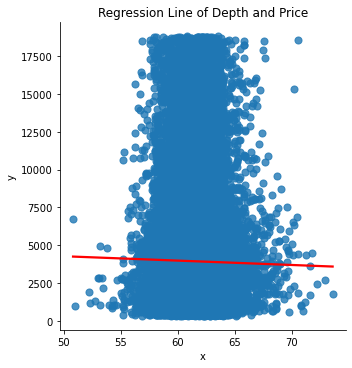

In [23]:
sns.lmplot(x='depth', y='price', data=diamond_df, ci=None, scatter_kws={"s": 50}, line_kws={"color": "red"})
plt.title('Regression Line of Depth and Price')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

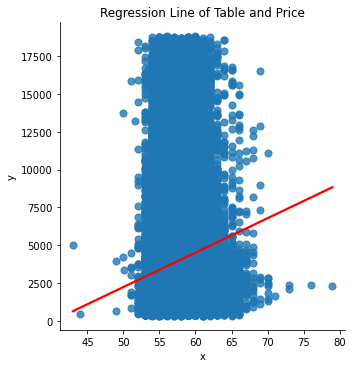

In [24]:
sns.lmplot(x='table', y='price', data=diamond_df, ci=None, scatter_kws={"s": 50}, line_kws={"color": "red"})
plt.title('Regression Line of Table and Price')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Violin Plot Of Categorical Variables 

Text(0.5, 1.0, 'Color Distribution ')

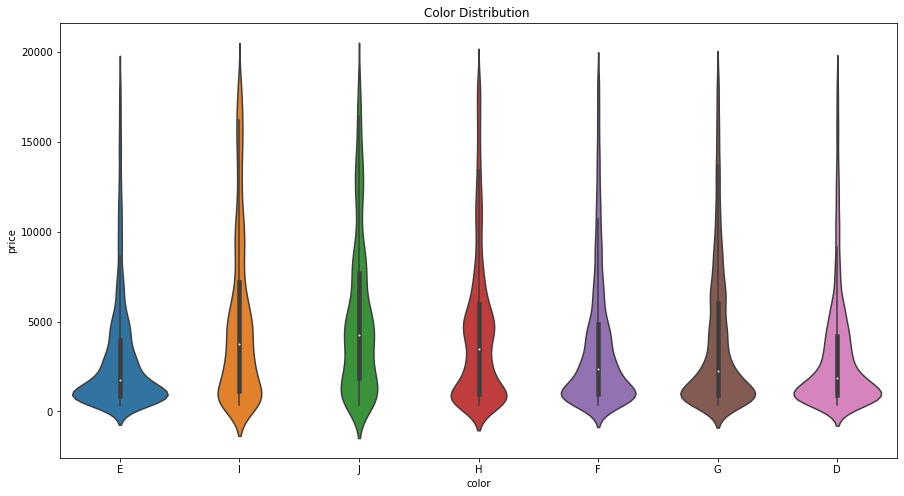

In [25]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='color',y='price',data= diamond_df)
plt.title("Color Distribution ")

Text(0.5, 1.0, 'Clarity Distribution ')

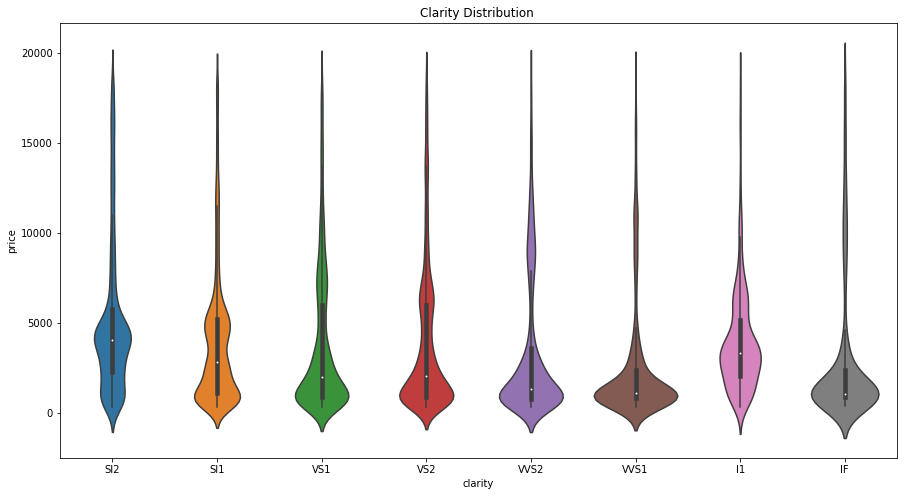

In [26]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='clarity',y='price',data= diamond_df)
plt.title("Clarity Distribution ")

Text(0.5, 1.0, 'Cut Distribution ')

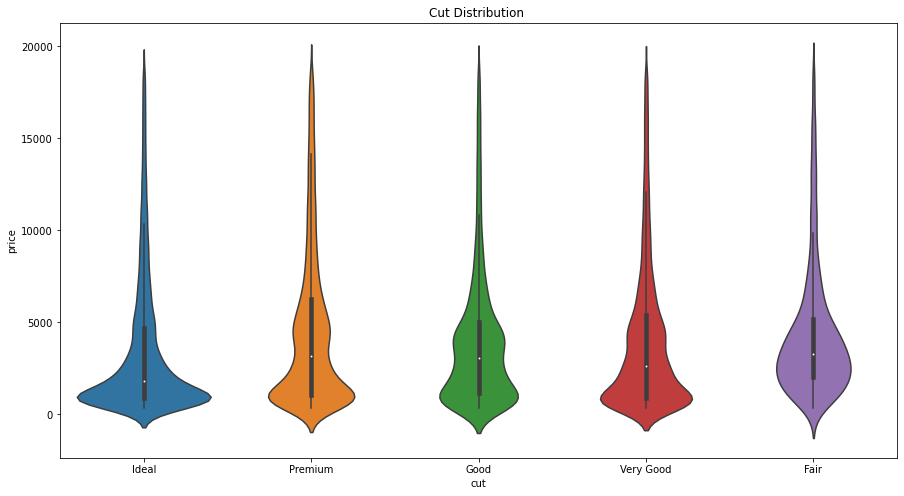

In [27]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='cut',y='price',data= diamond_df)
plt.title("Cut Distribution ")

### Label Encoding


In [28]:
from sklearn.preprocessing import LabelEncoder 
features= ['color','clarity','cut']
label_encoder= LabelEncoder()
for feature in features:
    diamond_df[feature]= label_encoder.fit_transform(diamond_df[feature])
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


### Points to notice:
- 'Carat','Depth', 'Table' and 'Depth' , and 'X;
- Looking at the scatter matrix, it is evident that between 'price' and other features exist a linear-like relationship. Therefore, linear regression or decision tree seems to be a great fit for our data. 


### Correlation 


In [29]:
correlation_matrix= diamond_df.corr()
correlation_matrix

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.017354,0.291307,-0.214143,0.029267,0.181797,0.921590,0.977777,0.976860,0.977037
cut,0.017354,1.000000,0.000177,0.028091,-0.195841,0.152591,0.039980,0.022166,0.028033,0.000809
color,0.291307,0.000177,1.000000,-0.027710,0.049040,0.026982,0.172358,0.270603,0.270408,0.275183
clarity,-0.214143,0.028091,-0.027710,1.000000,-0.053510,-0.088240,-0.071512,-0.225906,-0.222956,-0.229976
depth,0.029267,-0.195841,0.049040,-0.053510,1.000000,-0.302218,-0.010287,-0.024401,-0.027543,0.097525
table,0.181797,0.152591,0.026982,-0.088240,-0.302218,1.000000,0.127108,0.196327,0.190153,0.155670
price,0.921590,0.039980,0.172358,-0.071512,-0.010287,0.127108,1.000000,0.887212,0.888807,0.882634
x,0.977777,0.022166,0.270603,-0.225906,-0.024401,0.196327,0.887212,1.000000,0.998657,0.991665
y,0.976860,0.028033,0.270408,-0.222956,-0.027543,0.190153,0.888807,0.998657,1.000000,0.991327
z,0.977037,0.000809,0.275183,-0.229976,0.097525,0.155670,0.882634,0.991665,0.991327,1.000000


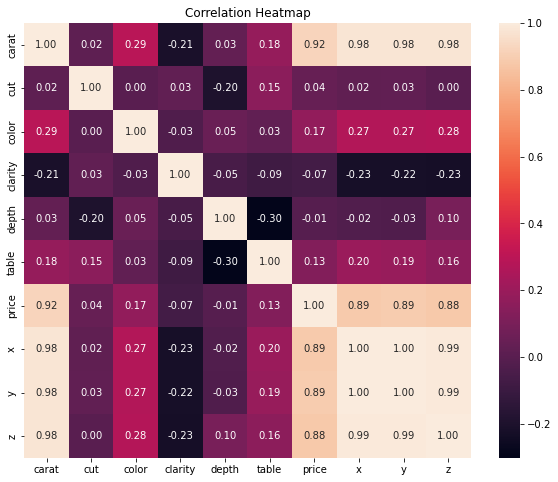

In [30]:
# heatmap 
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix,annot= True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Heatmap Interpretation: 
- From the heatmap, we can see that our target variable - 'price' is highly correlated with 'z','y',
'x', and 'carat'
- On the other hand, 'cut','depth' and 'table' show low correlation, we should consider dropping it, but we 

### Train-test split

In [31]:
X= diamond_df.drop(columns='price')
y= diamond_df['price']

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state= 42)

In [33]:
X_test.shape

(16173, 9)

In [34]:
X_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
26765,1.69,3,2,5,58.7,59.0,7.87,7.78,4.59
44667,0.36,2,5,5,61.8,55.0,4.60,4.63,2.85
29024,0.31,2,3,7,60.8,56.0,4.41,4.44,2.69
25604,2.08,3,4,3,58.8,60.0,8.39,8.35,4.92
29364,0.31,3,3,5,61.5,59.0,4.35,4.33,2.67


### Model Building

In [39]:
# import library 
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [36]:
linear_pipe= make_pipeline(
    StandardScaler(),
    LinearRegression()
)

In [40]:
decision_pipe= make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)
pipelines= { 'Linear Regression': linear_pipe,
            'Decision Tree Regression': decision_pipe}
for pipeline_name, pipeline in pipelines.items():
    pipeline.fit(X_train,y_train)
    y_pred= pipeline.predict(X_test)
    mse = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
    mse= -mse  
    r2_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
    print(f'MSE Of {pipeline_name} model: {mse}')
    print(f'R-squảe Of {pipeline_name} model: {mse}')
    

MSE Of Linear Regression model: [1445989.33778168 2275414.40426402 9697435.61334584  721748.77704567
  591295.90020946]
R-squảe Of Linear Regression model: [1445989.33778168 2275414.40426402 9697435.61334584  721748.77704567
  591295.90020946]
MSE Of Decision Tree Regression model: [ 1075542.46178817  4355522.50658505 14423909.12062888   126265.66638067
   348302.59472683]
R-squảe Of Decision Tree Regression model: [ 1075542.46178817  4355522.50658505 14423909.12062888   126265.66638067
   348302.59472683]
